# New York AirBnB Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
%matplotlib inline
import re
import plotly.express as px
#!pip install folium
import folium
from folium import plugins

SyntaxError: invalid syntax (3934114577.py, line 1)

# Importing Dataset

In [38]:
df=pd.read_csv("D:/Projects/Python Project College/NY airbnb Data Sets/AB_NYC_2019.csv",)
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Using shape

In [40]:
df.shape

(48895, 16)

# Using isnull to calculate  number of rows and columns in dataset

In [41]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Using describe to finding mean, count, max,min in dataset

In [42]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

# Plotting a Boxplot with 'Price'

{'whiskers': [<matplotlib.lines.Line2D at 0x296f40ffa60>,
 'caps': [<matplotlib.lines.Line2D at 0x296f410f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x296f40ff790>],
 'medians': [<matplotlib.lines.Line2D at 0x296f410f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x296f410f8b0>],
 'means': []}

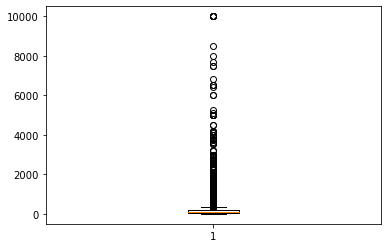

In [43]:
plt.boxplot(df["price"])

# Plotting a scatter graph between 'Price' & 'Availability'

<AxesSubplot:xlabel='price', ylabel='availability_365'>

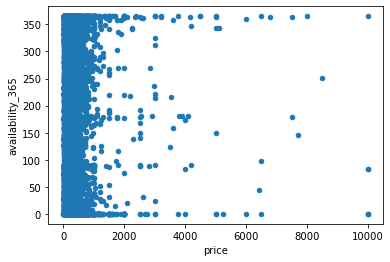

In [44]:
df.plot.scatter(x="price", y="availability_365")

# Drawing a Line Graph between 'Price' & 'Minimum' nights

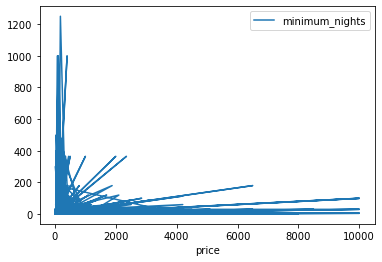

In [45]:


df.plot(x="price", y="minimum_nights")
plt.show()



# Observing the heatmap, between price and availability. 

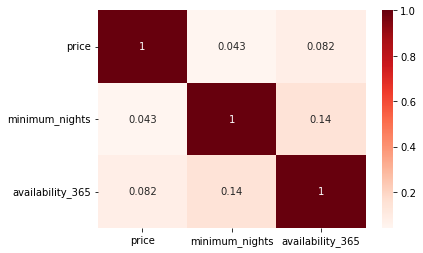

In [46]:


sns.heatmap(df[["price","minimum_nights","availability_365"]].corr(), annot=True, cmap="Reds")
plt.show()



## From the observation above
####  - Minimum correlation = Minimum Nights & Availability
####  - Moderate correlation = Price & Minimum Nights
####  -High correlation = Availability & Minimum nights

# Plotting a boxplot of availability

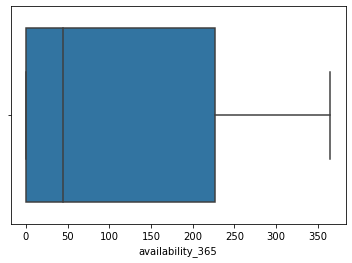

In [47]:


sns.boxplot(x=df["availability_365"])
plt.show()



# Missing null values in the columns using Heatmap

<AxesSubplot:>

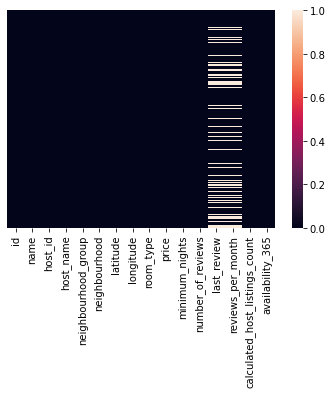

In [48]:
sns.heatmap(df.isnull(), yticklabels=False)

# Plotting Box Plot with Price & Room type

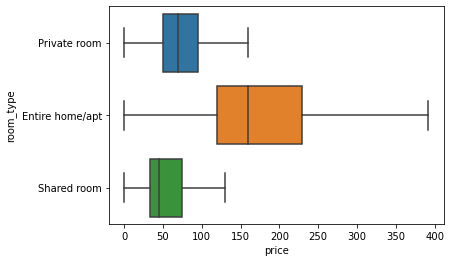

In [49]:
sns.boxplot(x='price' , y='room_type' , data = df, showfliers= False)
plt.show()

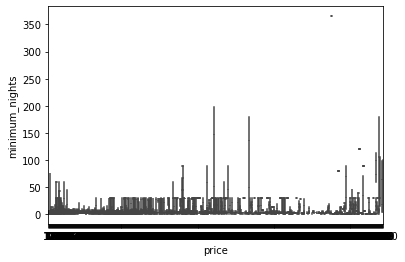

In [50]:


sns.boxplot(x='price' , y='minimum_nights' , data = df, showfliers= False)
plt.show()



# Data Cleaning

### Dropping a 'neighbourhood_group' which contain NaN values in whole column

In [51]:


df.pop('neighbourhood_group')



0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

## Dropping null values present in column 'reviews_er_month' and replace the null values with mean value of that column 

In [52]:


meanVal = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(value=meanVal, inplace=True)
df.head()



id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude        room_type  price  \
0         John    Kensington  40.64749  -73.97237     Private room    149   
1     Jennifer       Midtown  40.75362  -73.98377  Entire home/apt    225   
2    Elisabeth        Harlem  40.80902  -73.94190     Private room    150   
3  LisaRoxanne  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   
4        Laura   East Harlem  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19           0.210000   
1               1                 45  2019-05-21           0.380000   
2               3                  0         NaN           1.373221   
3               1                270  2019-07-05           4.640000   
4              10                  9  2018-11-19           0.100000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

## Replacing all the null values present in column 'Last_review' with standard value '2020-01-01;

In [53]:
df["last_review"].fillna("2020-01-01", inplace = True)

## Plotting a heatmap to find null value in our dataset, It shows no null value

<AxesSubplot:>

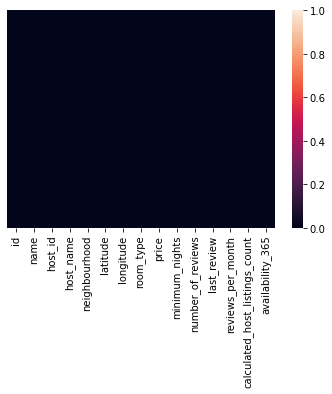

In [54]:


sns.heatmap(df.isnull(), yticklabels=False)



# Removing outliers 

In [55]:


Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(df['price'] >= (Q3+1.5*IQR))

lower = np.where(df['price'] <= (Q1-1.5*IQR))
 

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 



{'whiskers': [<matplotlib.lines.Line2D at 0x296fad75940>,
 'caps': [<matplotlib.lines.Line2D at 0x296fad75ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x296fad75670>],
 'medians': [<matplotlib.lines.Line2D at 0x296fad7f4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x296fad7f790>],
 'means': []}

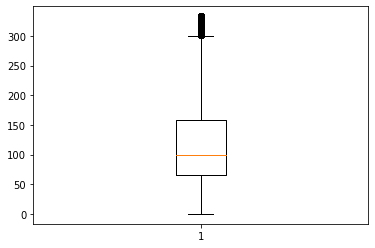

In [56]:


plt.boxplot(df["price"])



In [57]:


df.isna().any().sum()



2

In [58]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 45918, dtype: bool

In [59]:


df.isnull().sum()



id                                 0
name                              15
host_id                            0
host_name                         21
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [60]:
df['name'].isnull().sum()

15

In [61]:
dfnull= df.dropna()

In [62]:
dfnull.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

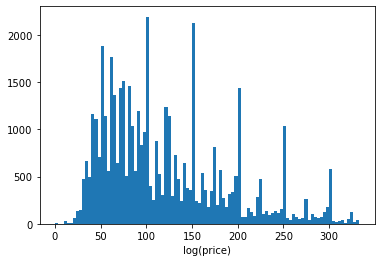

C:\Users\balap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

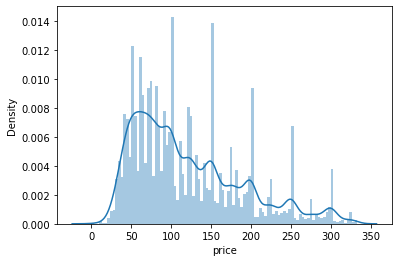

In [63]:


df['log_price'] = np.log(df['price'].values + 1)
plt.hist(df['price'].values, bins=100)
plt.xlabel('log(price)')
#plt.ylabel('number of')
plt.show()
sns.distplot(df["price"], bins =100)



## The Price is concentrated on a specific range about 100-250 Dollars.

## The average price is around 140 Dollars per night



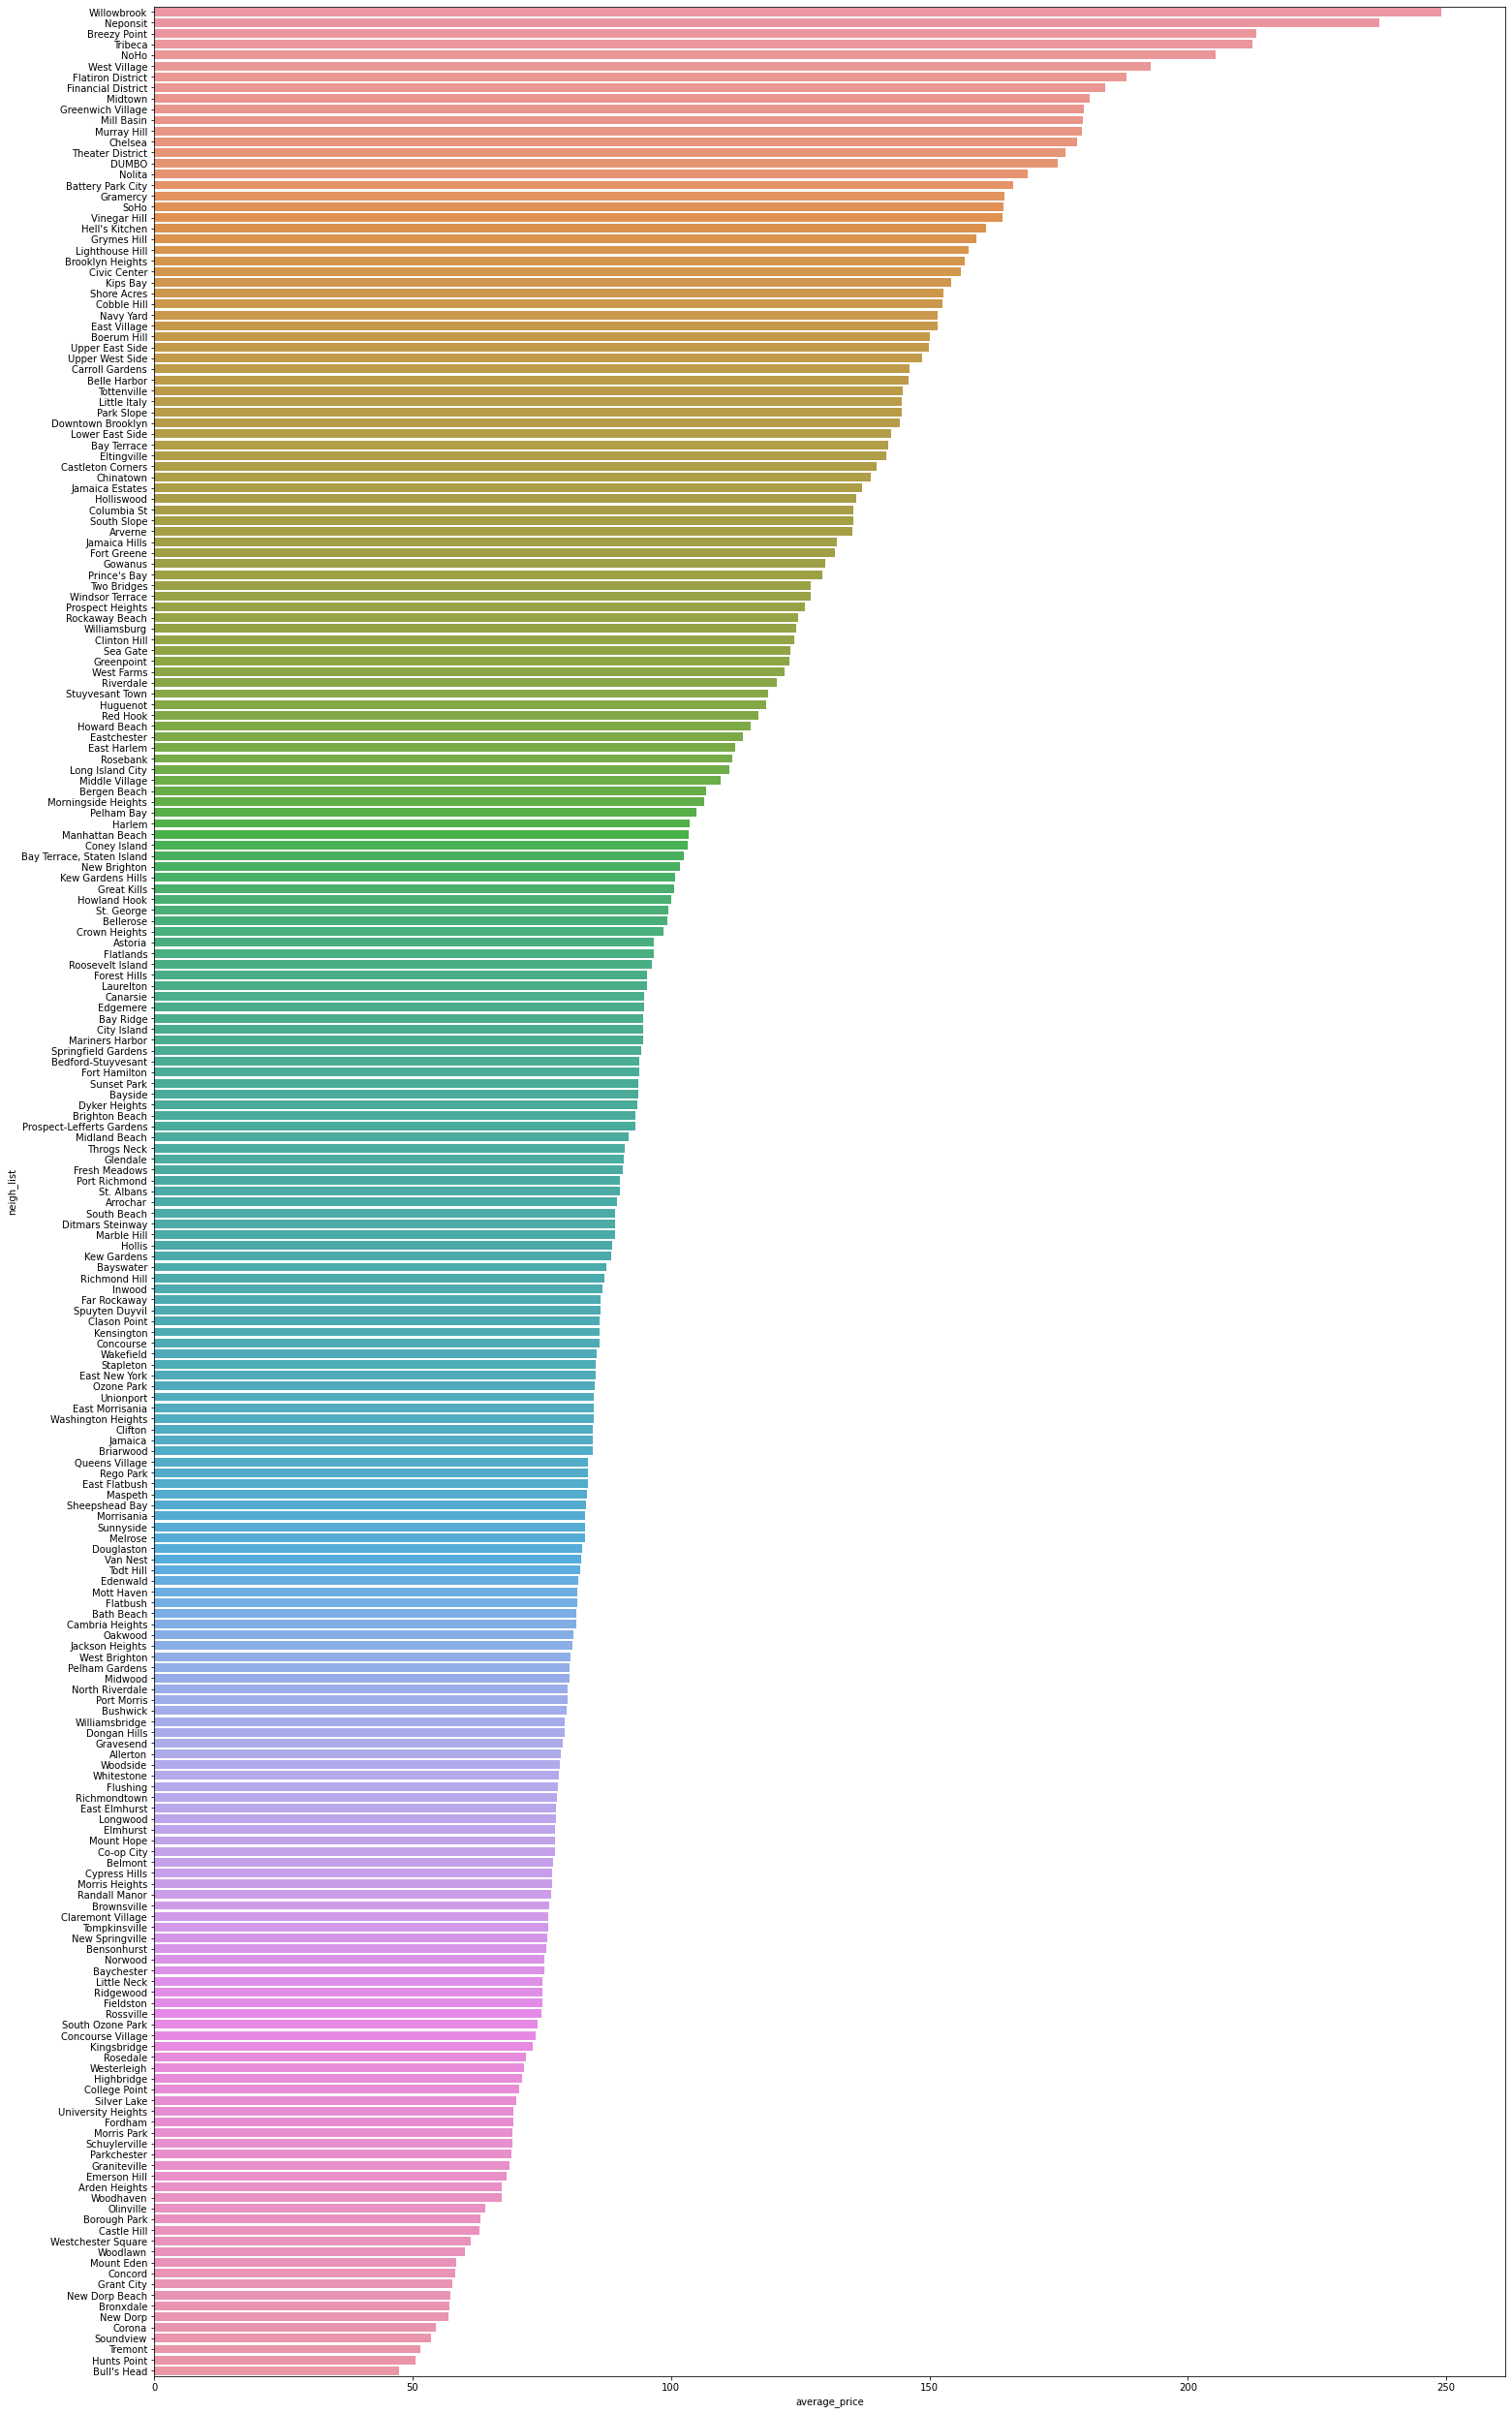

In [64]:


neigh_list=list(df['neighbourhood'].unique())
average_price=[]

for i in neigh_list:
    x=df[df.neighbourhood==i]
    neigh_average=sum(x.price)/len(x)
    average_price.append(neigh_average)

df1=pd.DataFrame({'neigh_list':neigh_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(25,45))
ax=sns.barplot(x=sorted_data.average_price,y=sorted_data.neigh_list)



# Most reserved neighborhood by using mumber of reviews

Text(0.5, 1.0, 'Review numbers of Airbnb in Chicago by Neighbourhood')

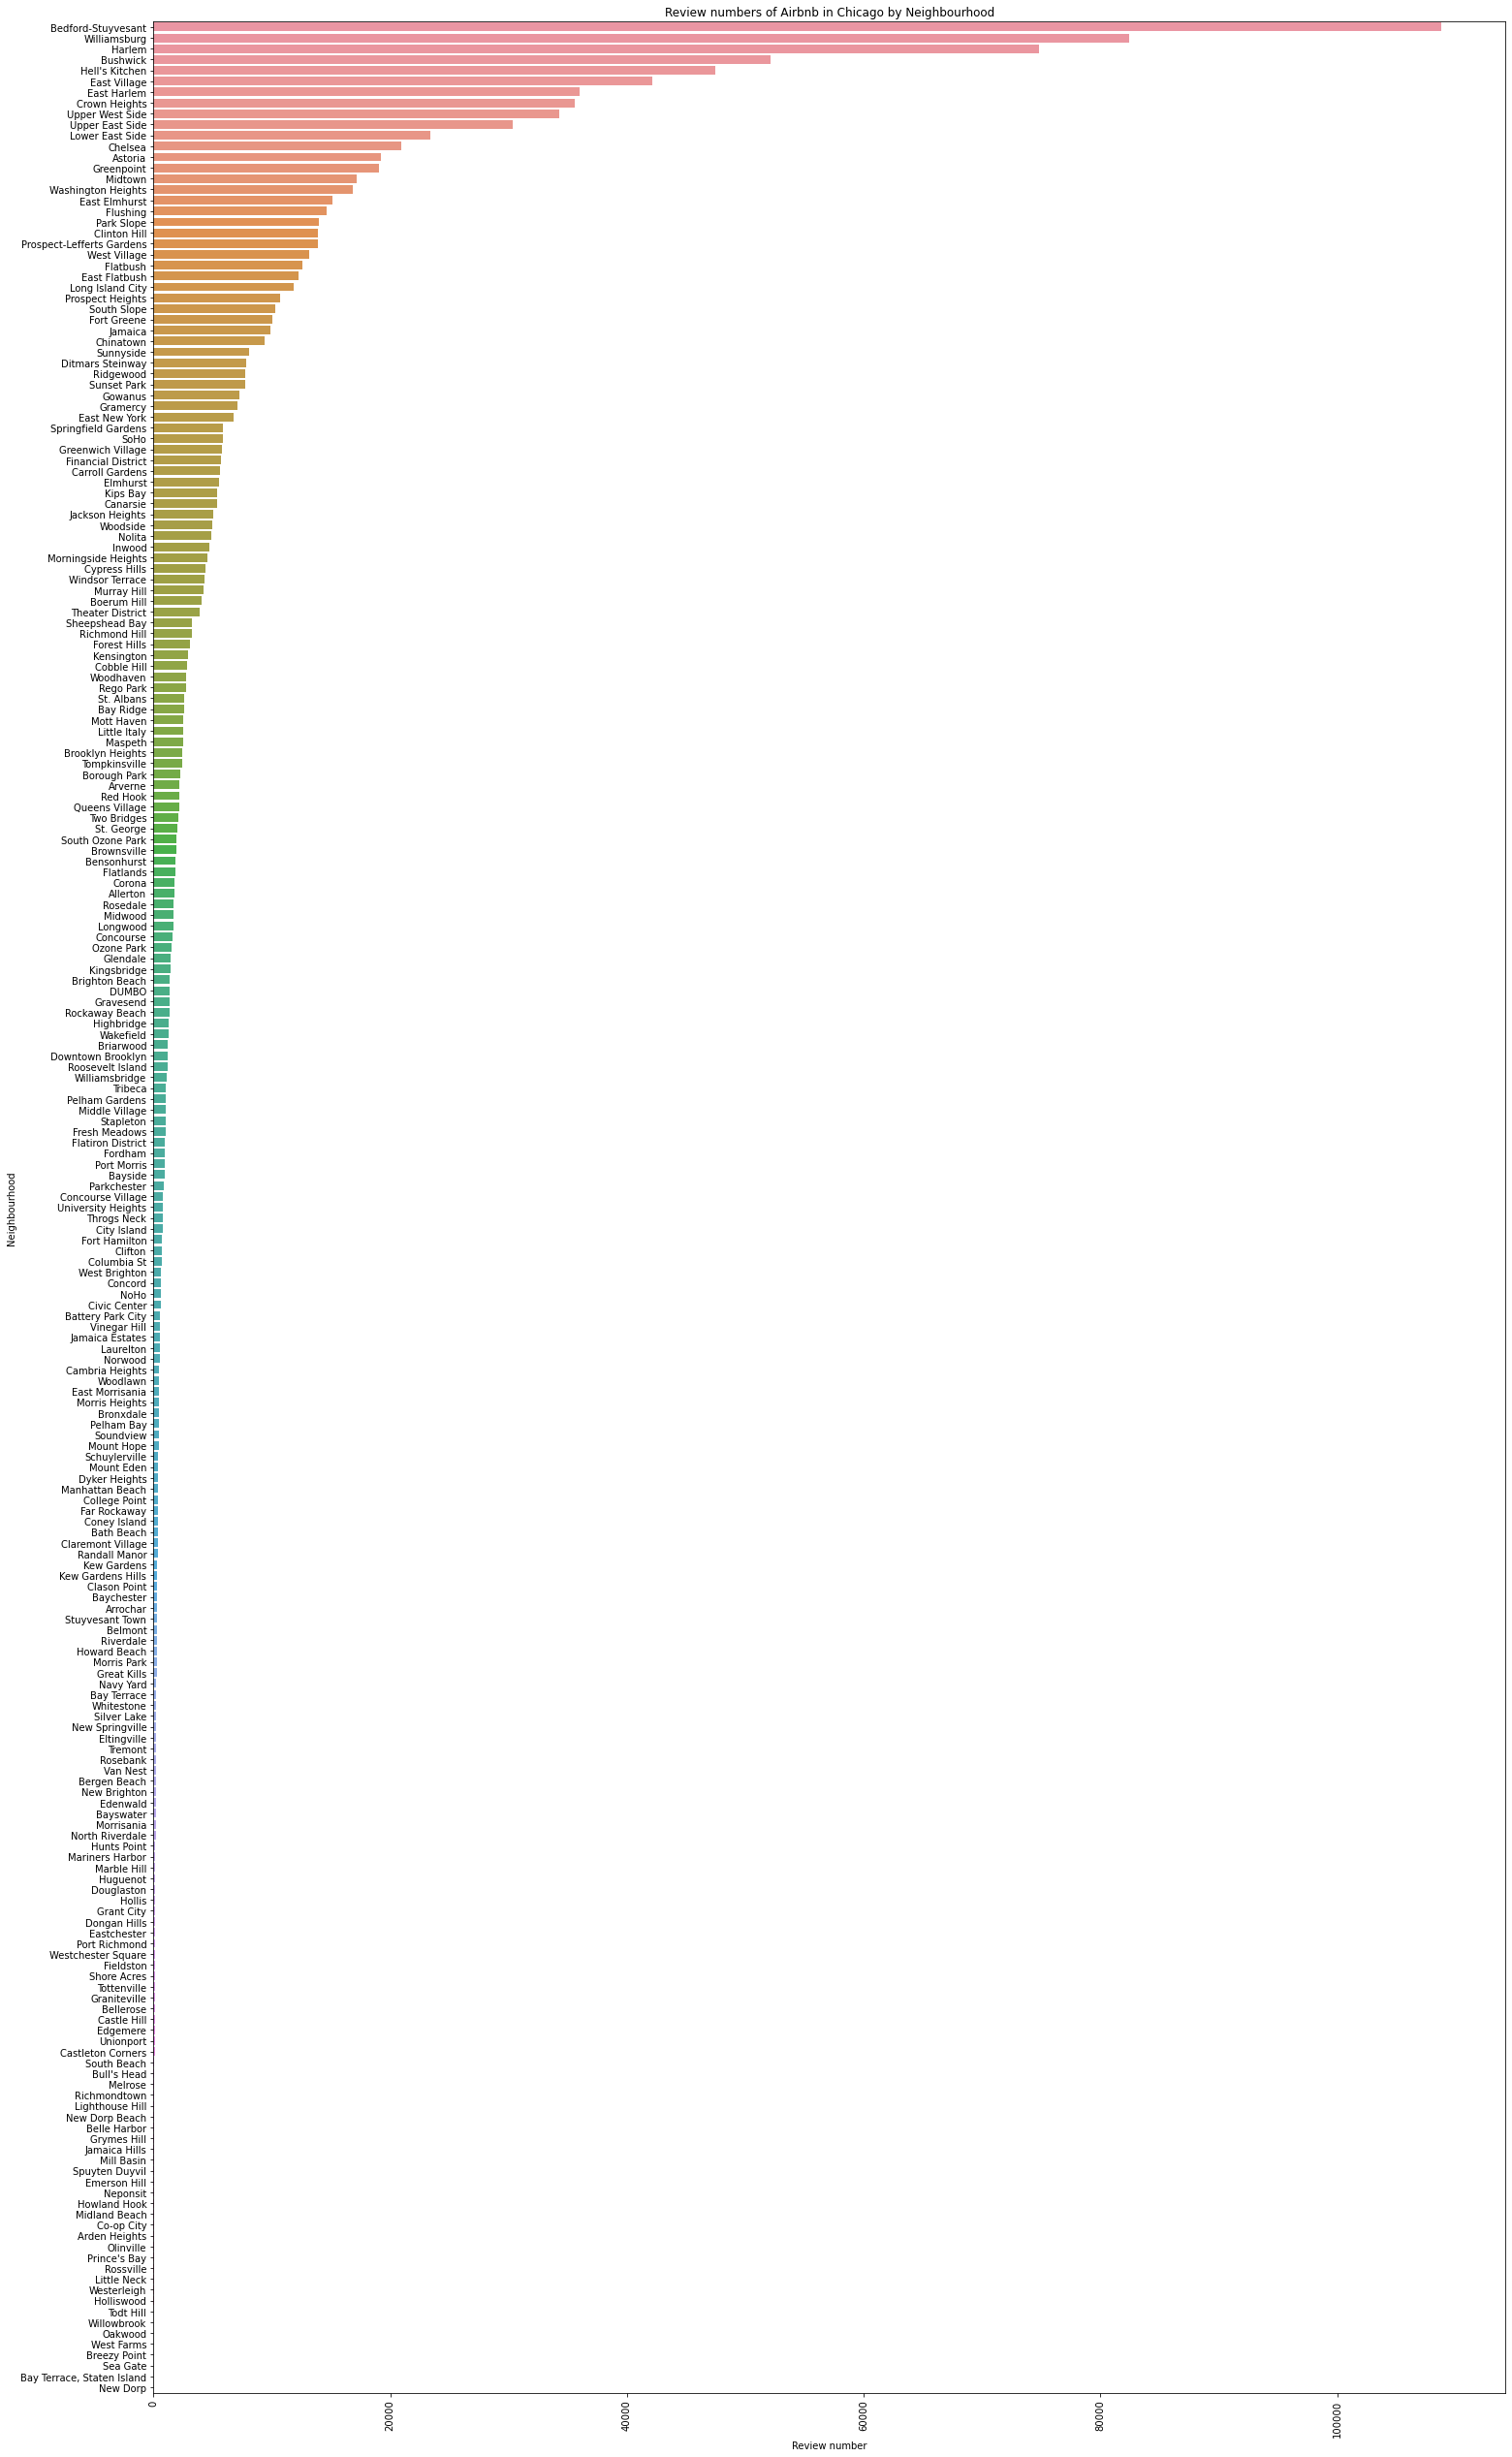

In [65]:


neigh_list=list(df['neighbourhood'].unique())
review=[]

for i in neigh_list:
    x=df[df.neighbourhood==i]
    review_sum=sum(x.number_of_reviews)
    review.append(review_sum)
    
df2=pd.DataFrame({'neigh_list':neigh_list,'review':review})
new_index2=df2.review.sort_values(ascending=False).index.values
sorted_data2=df2.reindex(new_index2)

plt.figure(figsize=(25,45))
ax2=sns.barplot(x=sorted_data2['review'],y=sorted_data2.neigh_list)

plt.xticks(rotation=90)
plt.ylabel('Neighbourhood')
plt.xlabel('Review number')
plt.title('Review numbers of Airbnb in Chicago by Neighbourhood')



# The above plot shows the most expensive place has the most review, But the places also has fair location with fair price are more popular.

### Also to note, If more hotels in downtown are people would not book airbnb.

### Sometimes Area which is deserted might have a lot of Airbnb's


In [78]:


fig=px.scatter(df, x='price', y='number_of_reviews',
           color='neighbourhood',size='number_of_reviews',size_max=30)
fig.update_layout(autosize=True,width=900,height=800)
fig



## The Room Type

### Airbnb Contains different room types, you can have an entire place or you can also choose to stay with other people.

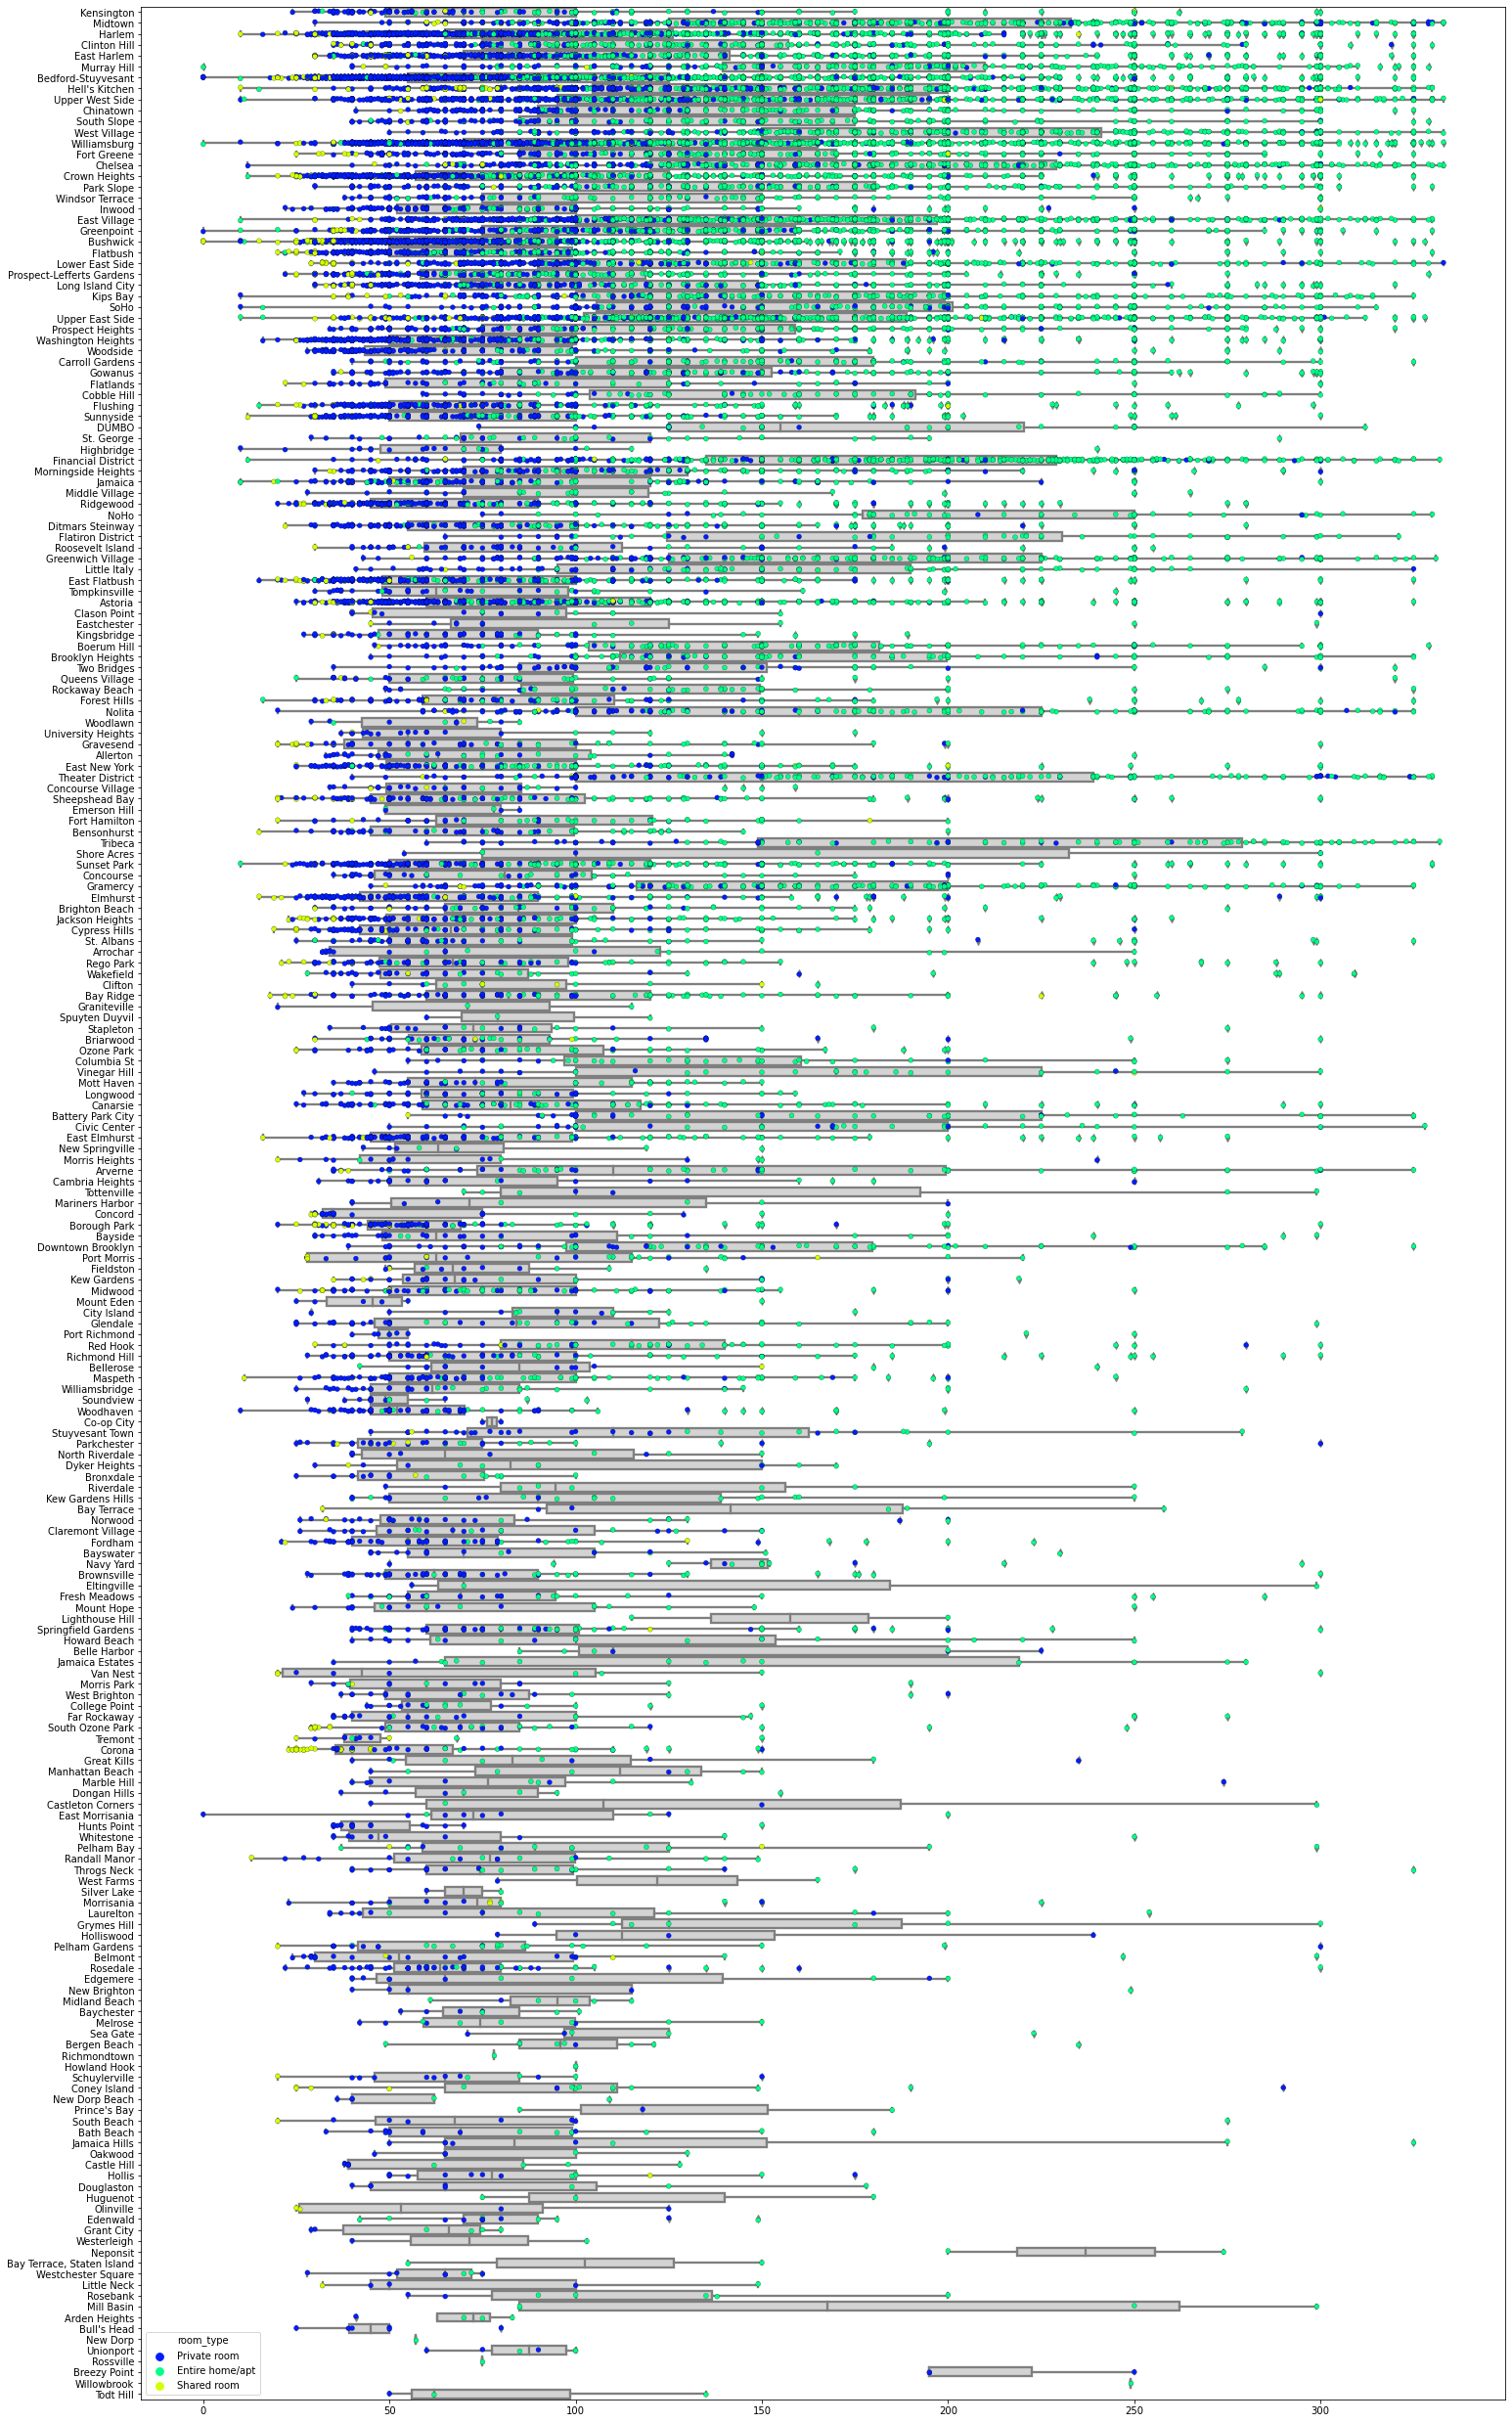

In [79]:


plt.figure(figsize=(25,45))
vendor_graph = sns.boxplot(x = 'price', y = 'neighbourhood', data = df,
                           color = 'lightgrey', linewidth = 2.3)
plt.setp(vendor_graph.artists, alpha = 0.5)

sns.stripplot(data = df, x = 'price', y = 'neighbourhood', jitter = 1, size = 5,
              edgecolor = 'black', linewidth = .2, palette = 'gist_rainbow_r',hue = 'room_type')

vendor_graph.xaxis.label.set_visible(False)
vendor_graph.yaxis.label.set_visible(False)
plt.show()


C:\Users\balap\anaconda3\lib\site-packages\joypy\joyplot.py:286: UserWarning:

The data contains a group with a single distinct value (100) having infinite probability density. Consider using a different visualization.



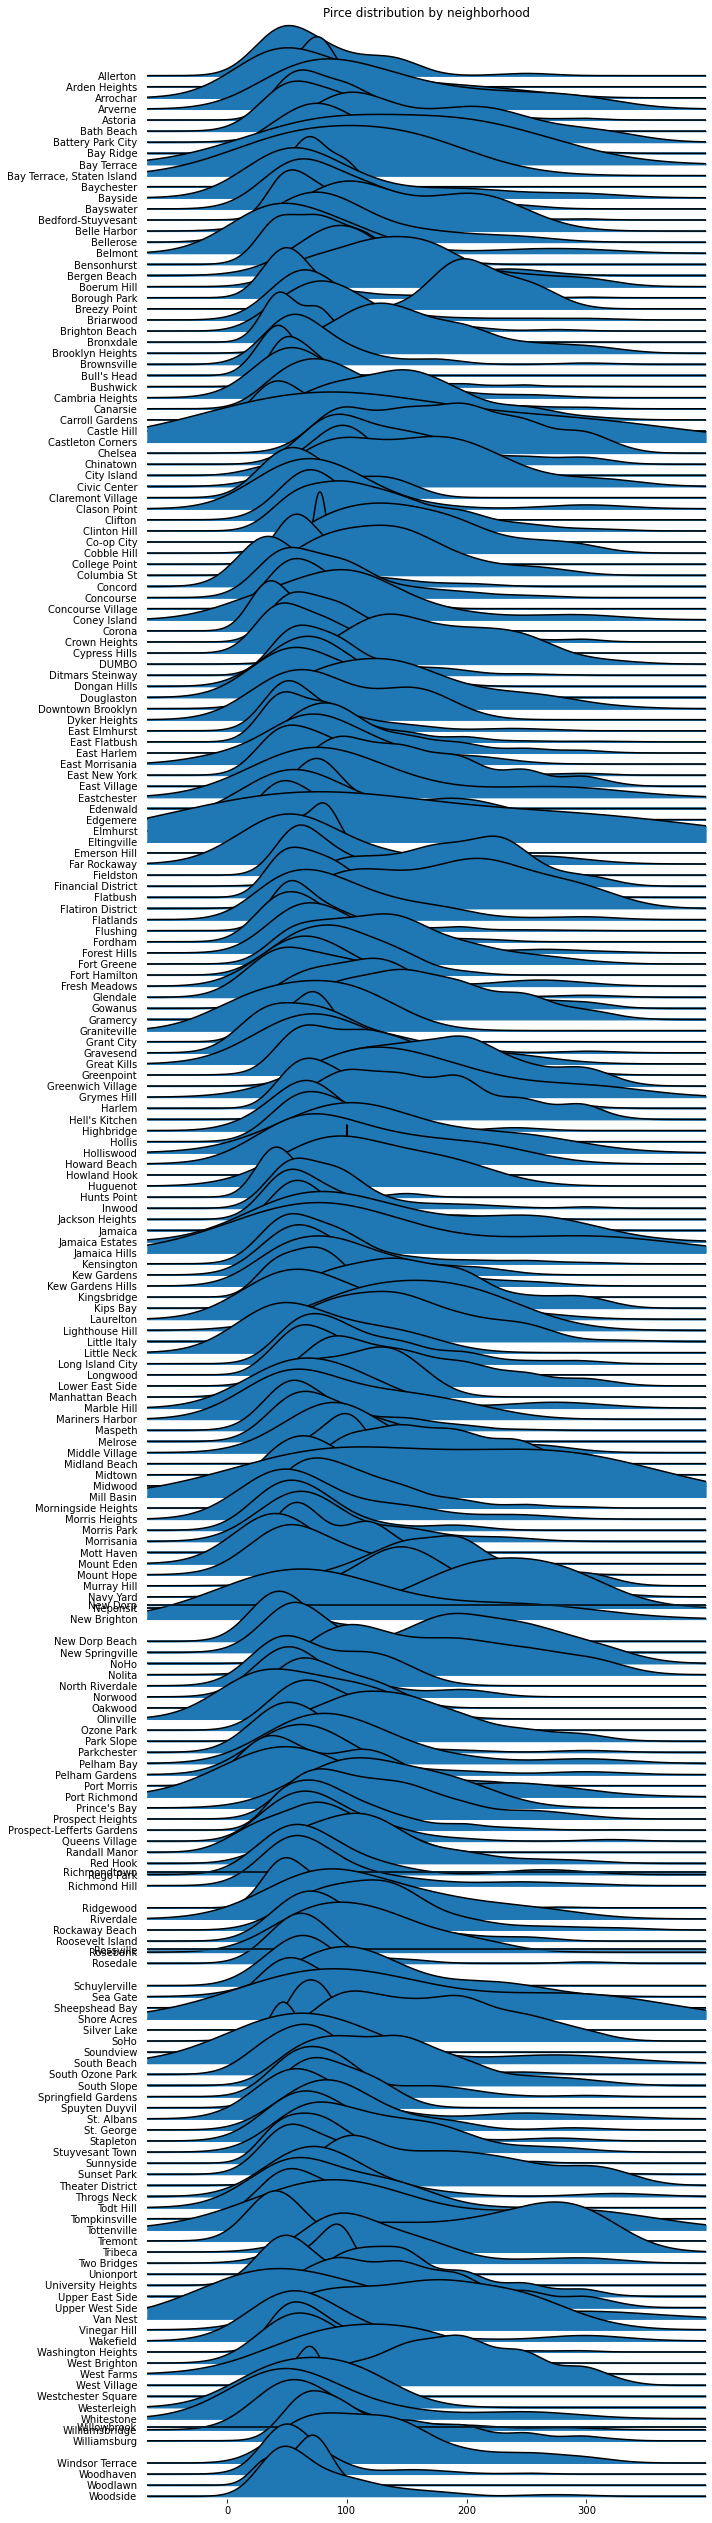

In [75]:
#!pip install joypy

import joypy
# Draw Plot
fig, axes = joypy.joyplot(df, column=['price'], by="neighbourhood", ylim='own', figsize=(10,35))

# Decoration
plt.title('Pirce distribution by neighborhood')
plt.show()
    



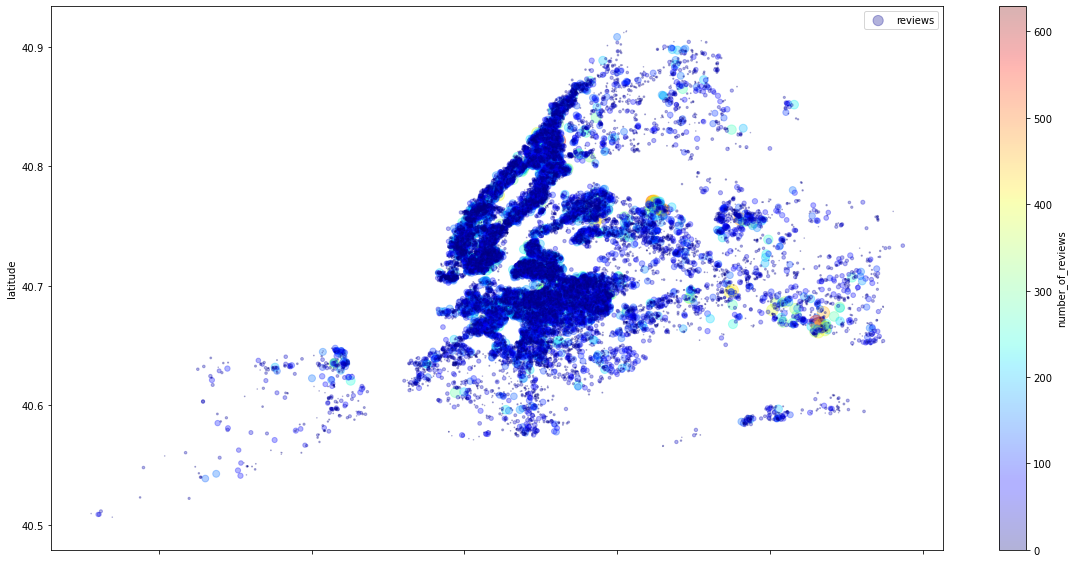

In [76]:


df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['number_of_reviews']/3, label="reviews",
    c="number_of_reviews", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.3, figsize=(20,10),
)
plt.legend()
plt.show()



<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

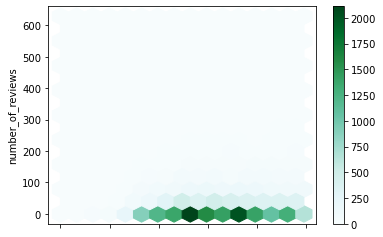

In [77]:
df[df['price'] < 100].plot.hexbin(x='price', y='number_of_reviews', gridsize=15)

## In this Hex Plot, we can see the no. of reviews lies between 0 to 300 evert price point

# Conclusion
#### 1. Seems the price is really concetrate on a specific range, about 100-250 dollars > the average price will be 140 dol lars per night, > which is seems a fair price for a big city.
#### 2. It's actually make sense that the most expensive place has the most review, > but the places also has fair location with fair price are more popular, > especially there will be more hotels in downtown area, people probably will not choose airbnb > So choose wisely next time you go there.
#### 3.When we talk about availibilty of room type, it seems than Entire apartment / Home is available and then private room is available and price are also fair of that room type.